In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('videogamedata.csv')
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Exploratory Data Analysis

Data collection and loading

In [25]:
# Initial inspection
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [27]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Assess Data Complexity

In [28]:
df.columns.unique()

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [29]:
df['Platform'].apply(type).value_counts()

Platform
<class 'str'>    16598
Name: count, dtype: int64

Data Sufficiency for Model Building

In [30]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [31]:
data1 = df[['Year', 'Global_Sales']]
data1.corr()

,Year,Global_Sales
Year,1.000000,-0.074735
Global_Sales,-0.074735,1.000000


In [32]:
data2 = df[['NA_Sales', 'Global_Sales']]
data2.corr()

,NA_Sales,Global_Sales
NA_Sales,1.000000,0.941047
Global_Sales,0.941047,1.000000


In [33]:
data3 = df[['EU_Sales', 'Global_Sales']]
data3.corr()

,EU_Sales,Global_Sales
EU_Sales,1.000000,0.902836
Global_Sales,0.902836,1.000000


In [34]:
data4 = df[['JP_Sales', 'Global_Sales']]
data4.corr()

,JP_Sales,Global_Sales
JP_Sales,1.000000,0.611816
Global_Sales,0.611816,1.000000


In [35]:
data5 = df[['Other_Sales', 'Global_Sales']]
data5.corr()

,Other_Sales,Global_Sales
Other_Sales,1.000000,0.748331
Global_Sales,0.748331,1.000000


Checking for Missing data

In [36]:
# Total missing values per column
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [37]:
# Percentage of missing data
df.isnull().mean()

Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [38]:
# Visualizing the missing data using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

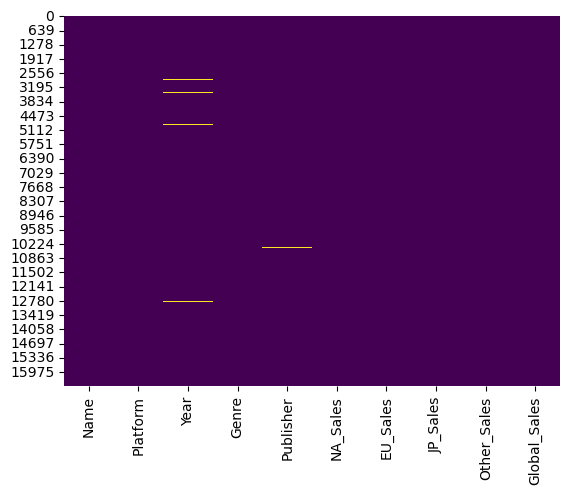

In [39]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

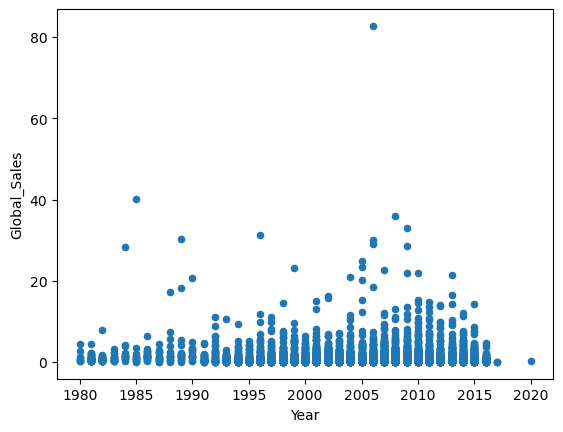

In [40]:
df.plot(kind='scatter', x='Year', y='Global_Sales')
plt.show()

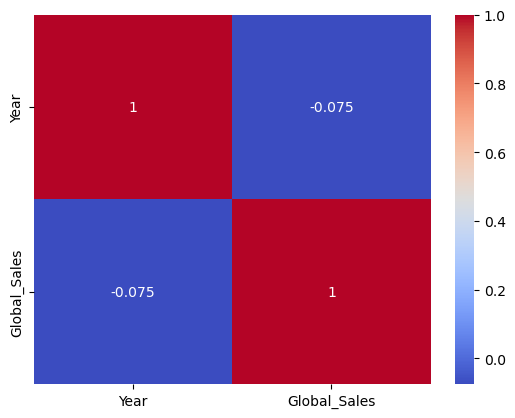

In [41]:
# Correlation heatmap to visualize relationship
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.show()

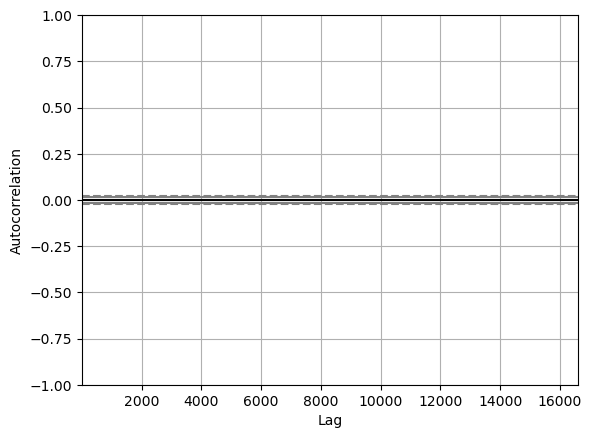

In [42]:
# Check for Independent Observations
# For time-series data or sequential data, check, for autocorrelation
pd.plotting.autocorrelation_plot(df['Year'])
plt.show()

In [43]:
# for categorical data, analyze patterns in repeated values
df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

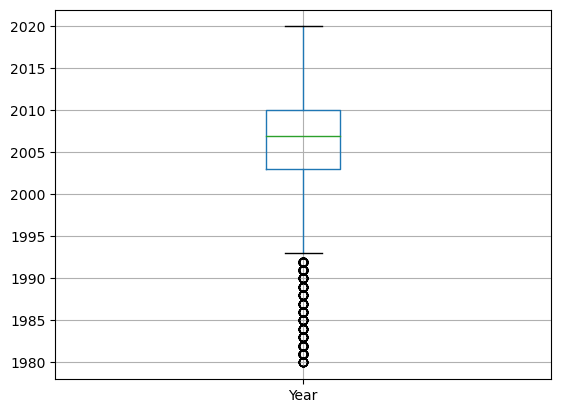

In [44]:
# Identify outliers
  # Use boxplots to detect outliers
df.boxplot(column='Year')
plt.show()

In [45]:
# Check for mislabeled data or unwanted correlations
# Detect potential labeling issues in categorical columns
df['Genre'].unique() # Spot unusual or mislabeled

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

# Data Preprocessing

Handeling missing values

In [46]:
# Column 'Year' and 'Publisher' have missing values
df = df.dropna()

In [47]:
# Remove unnecessary or irrelevant columns that don't add value to the model
#df.drop(['NA_Sales', 'Other_Sales'], axis=1, inplace=True)


In [48]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [49]:
# Replace abbreviations with their full form to standardize the text in columns
df['Publisher'] = df['Publisher'].replace({'Nintendo': 'Pokemon'})
df['Publisher']

/var/folders/_q/xth4wk514411yy1z0pnk47840000gn/T/ipykernel_2858/2050376766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher'] = df['Publisher'].replace({'Nintendo': 'Pokemon'})


0           Pokemon
1           Pokemon
2           Pokemon
3           Pokemon
4           Pokemon
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16291, dtype: object

Model Traning

In [50]:
# X (features): 'feature1', 'feature2', 'feature3'
# Y (target): 'target'
X = df[['Year', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'NA_Sales']] # Select feature columns
Y = df['Global_Sales'] # Select target column

Linear Regression

In [51]:
# Splitting the dataset into traning, test and validation sets
from sklearn.model_selection import train_test_split

In [52]:
# Split the data into traning and tempory sets(for validation/test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
# Split the tempory set into validation and test sets
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [53]:
# Training the Linear Regression model: Once the dataset is split, we can fit the Linear Regression model on the traning data
from sklearn.linear_model import LinearRegression
# Initialize Linear Regression
model = LinearRegression()
# Train the model on the traning data
model.fit(X_train, Y_train)

LinearRegression()

Model Validation

In [54]:
# Evaluate the model using the validation set to ensure it generalizes well
val_prediction = model.predict(X_val)
validation_score = model.score(X_val, Y_val)
# R_squared score on validation data
print(f"Validation R^2 Score: {validation_score}")

Validation R^2 Score: 0.9999934807204968


In [55]:
# Evaluate the model on the test set and check the final performance
test_predictions = model.predict(X_test)
test_score = model.score(X_test, Y_test) 
# R
print(f"Test R^2 Score: {test_score}")

Test R^2 Score: 0.9999878361440446


Model Evaluation

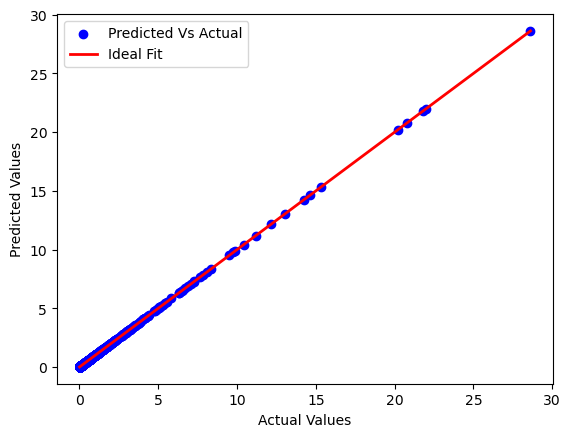

In [56]:
plt.scatter(Y_test, test_predictions, color='blue', label='Predicted Vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [58]:
import pickle
# Save the model to a file
with open('model.pkl', 'wb')as file:
    pickle.dump(model, file)